<a href="https://colab.research.google.com/github/ms624atyale/Python_Basics/blob/main/WordCloud_Tokenize_Check_Temp_14OCT23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🐹 🐾 [Text Corpus <font size='1.8'>코퍼스/말뭉치</font>](https://en.wikipedia.org/wiki/Text_corpus)
- In linguistics, a corpus (plural corpora) or text corpus is a language resource consisting of a large and structured set of texts (nowadays usually electronically stored and processed). In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

- The **corpus-toolkit** package grew out of courses in corpus linguistics and learner corpus research. The toolkit attempts to balance simplicity of use, broad application, and scalability. Common corpus analyses such as the <font color = 'red'>_calculation of word and n-gram frequency and range, keyness, and collocation_</font> are included. In addition, more advanced analyses such as the identification of <font color = 'red'>_dependency bigrams (e.g., verb-direct object combinations) and their frequency, range, and strength of association_</font>  are also included.(https://pypi.org/project/corpus-toolkit/)

Some conditions should be fulfilled if you want to conduct corpus-related analysis.

>1. Read and write a file using an operating system package.
>2. 🆘 import the **[os](https://docs.python.org/3/library/os.html)** module.


>3. Text files you want to analyze (e.g., url(uniform resource locator) with html document, text files under the Files dicrectory of Google Colab).
>4. Text ➡️ Words: **Tokenization**
>5. Words with the conjugation, inflection, derivation process ↔️ Words sorted by grouping inflected or variant forms of the same word (i.e., **lemmatization**)
>6. POS (part of speech (e.g., word-grammatical category pairs))
>7. 🆘 Install **corpus-toolkit** and **nltk**(natural language tool kit) packages.



In [2]:
#@markdown 📌 Download the os module
import os

In [3]:
#@markdown 📌 Make a new working directory as "txtdata". 📎 <Module name: os> <function: mkdir>

os.mkdir("txtdata")

In [4]:
#@markdown 📌 Download the corpus-toolkit package
!pip install corpus-toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00


In [7]:
from urllib.request import urlopen

#@markdown 📌 Open a txt file. <Use a set of duble quotation marks "" and assign the url address as the _url_ variable>
curdir="/content/txtdata/2_NoQuotesAllText_TitleBodyLesson.txt"
#When you copy and paste, i) go to the repository of your/someone else's github, ii) click on a txt file of your interest, iii) click on <raw> icon around at the top right hand corner, and iii) copy & paste the url staring with "https://raw.githubusercontent.com/..."


os.system("curl " + curdir + " > txtdata.txt") #This moves the whole text of the url to the txtdata folder.

file = open("txtdata.txt")
text = file.read().replace("\n", " ") #Replace line with a space.
file.close() #Close the file you have been working on.

#@markdown 📎 When you see txtdata.txt under the Files directory, move it under the txtdata folder you've created by drag & drop.

#### 🆘 **Drag your txtdata.txt file to the txtdata folder.**

In [12]:
#@markdown 📌 i) Tokenize your text and ii) Get frequency.

from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
for token in tok_corp:
  print(token)

#💣💊You cannot get tokens by simply using print(tok_corp). You should use FOR Statement!

Processing 2_NoQuotesAllText_TitleBodyLesson.txt (1 of 1 files)
['the', 'wolf', 'and', 'the', 'kid', '', 'the', 'tortoise', 'and', 'the', 'duck', 'the', 'young', 'crab', 'and', 'he', 'mother', 'the', 'frog', 'and', 'the', 'ox', '', 'the', 'dog', 'the', 'cock', 'and', 'the', 'fox', '', 'bell', 'the', 'cat', '', '', 'the', 'eagle', 'and', 'the', 'jackdaw', '', 'the', 'boy', 'and', 'the', 'filbert', '', 'hercule', 'and', 'the', 'wagoner', '', 'the', 'kid', 'and', 'the', 'wolf', '', 'the', 'town', 'mouse', 'and', 'the', 'country', 'mouse', '', 'the', 'fox', 'and', 'the', 'grape', '', 'the', 'bundle', 'of', 'stick', '', 'the', 'wolf', 'and', 'the', 'crane', '', 'the', 'ass', 'and', 'he', 'driver', '', 'the', 'ox', 'and', 'the', 'wheel', '', 'the', 'lion', 'and', 'the', 'mouse', '', 'the', 'shepherd', 'boy', 'and', 'the', 'wolf', 'the', 'gnat', 'and', 'the', 'bull', '', 'the', 'plane', 'tree', '', 'the', 'farmer', 'and', 'the', 'stork', '', 'the', 'sheep', 'and', 'the', 'pig', '', 'the', 'tr

In [10]:
mydata = ct.frequency(mydata) #creates a frequency dictionary

In [13]:
#@markdown 📌 Tagging (i.e., associating each token with a grammatical category (e.g., mountain - N) )
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Processing 2_NoQuotesAllText_TitleBodyLesson.txt (1 of 1 files)


In [14]:
#@markdown 📌 Get frequency of your tagged tokens. 'hits=10' means you want to get the top 10 words.

tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

Processing 1.txt (1 of 1 files)
the_DET	2172
and_CCONJ	901
a_DET	838
be_AUX	831
he_PRON	761
to_PART	566
of_ADP	506
his_PRON	372
in_ADP	356
you_PRON	313


## 💡 Now, let's save tagged data as a dataframe and get word clouds!

In [15]:
#@markdown 📌  Tagged data is in a dictionary format (e.g., {key:value}).
type(tagged_freq)

dict

In [16]:
#@markdown 📌 Import the pandas package so as to handle dataframe.

import pandas as pd

In [17]:
#@markdown 📌 Generate a dateframe with tagged words (e.g., word_POS) and their frequencies.

data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns = ["Tagged","Freq"]
print(df)

                Tagged  Freq
0              the_DET  2172
1           Wolf_PROPN   113
2            and_CCONJ   901
3            Kid_PROPN    13
4       Tortoise_PROPN    15
...                ...   ...
3032       circle_VERB     1
3033     boasting_NOUN     1
3034  chanticleer_NOUN     1
3035        rival_NOUN     1
3036       Pride_PROPN     1

[3037 rows x 2 columns]


## 💡 Splitting tagged columns into Words and POS <font size = '2.3'> part of speech (i.e., grammatical categories)
  - e.g.,
              column          column 1.    column2
          yesterday_ADP ➡️   yesterday       ADP
          rain_NOUN             rain         NOUN
          yellow_ADJ           yellow.       ADJ

In [18]:
#@markdown 📌 Codelines to get tagged columns split into words and POS

tagged = df["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

print(len(tagged))
print(word[:10])
print(pos[:10])

3037
['the', 'Wolf', 'and', 'Kid', 'Tortoise', 'duck', 'Young', 'Crab', 'his', 'mother']
['DET', 'PROPN', 'CCONJ', 'PROPN', 'PROPN', 'NOUN', 'PROPN', 'PROPN', 'PRON', 'NOUN']


In [19]:
#@markdown 📌 Add new columns to the dataframe.

df["POS"] = pos
df["Word"] = word

# Rearranging column order (remove Tagged column)
cols = ["POS","Word","Freq"]
df = df[cols]

# Sort by POS and Freq
df = df.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df.head()

Total rows:  3037


,POS,Word,Freq
1709,X,nearer,1
2467,X,ass,1
259,VERB,say,158
548,VERB,have,122
346,VERB,see,112


In [21]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Sample text
#text = "This is a sample text. This text is used for demonstration purposes. Sample text."

# Tokenize the text into words
%cd \content\txtdata.txt
words = word_tokenize(txtdata.txt)

# Calculate word frequencies
freq_dist = FreqDist(words)

# Get the most common words and their counts
most_common = freq_dist.most_common(5)  # Change 5 to the desired number of top words

# Print the results
for word, count in most_common:
    print(f'{word}: {count}')






[Errno 2] No such file or directory: 'contenttxtdata.txt'
/content


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: ignored

##⛅  Creating wordclouds by POS
>1. Below, "wc" takes text, not list. So we make word-list-by-POS into a text using 'join'.
>2. In addition, the joined text should include words according to their frequency. (e.g., if "before" occurs 5 times, then the text should include "before before before before before".

In [ ]:
#@markdown 📌 Select POS = VERB
df1 = df[df["POS"] == "VERB"]; print(len(df1))

# as list
freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y); print(len(txt2))
print(txt2)

693
693
693
20762
say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have 

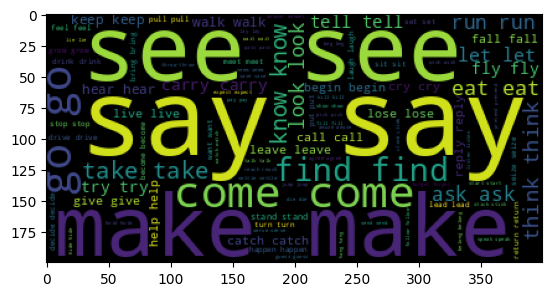

In [ ]:
#@markdown 📌 High frequency POS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2))
plt.imshow(wc)


## ⛅ ⛅The following codes will provide you POS options such as NOUN, ADJ, ADV.

## 📎 Select POS you want.

693
       POS      Word  Freq
89    VERB       say   158
420   VERB      have   124
187   VERB       see   112
12    VERB      make    97
485   VERB       get    84
...    ...       ...   ...
3131  VERB      yard     1
3133  VERB   express     1
3135  VERB  approach     1
3136  VERB      shut     1
3144  VERB    circle     1

[693 rows x 3 columns]


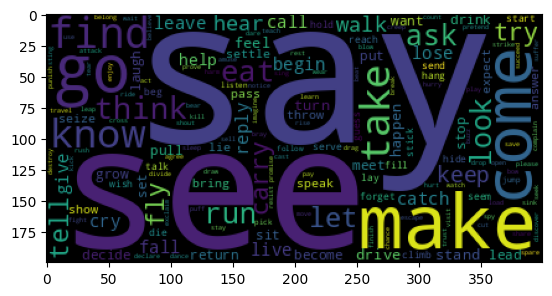

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

1188
       POS         Word  Freq
214   NOUN          day    74
471   NOUN         time    63
50    NOUN         head    43
81    NOUN          way    33
320   NOUN        water    32
...    ...          ...   ...
3140  NOUN         gain     1
3145  NOUN     overhead     1
3146  NOUN     boasting     1
3147  NOUN  chanticleer     1
3148  NOUN        rival     1

[1188 rows x 3 columns]


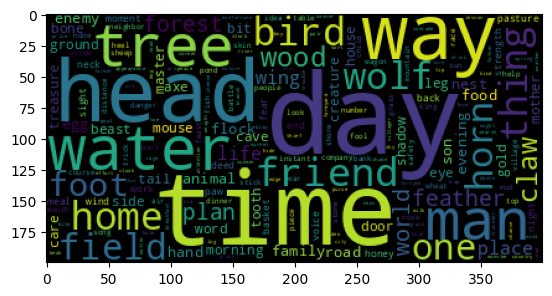

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

439
      POS        Word  Freq
306   ADJ        good    57
335   ADJ       great    53
8     ADJ      little    44
296   ADJ         old    38
194   ADJ       other    35
...   ...         ...   ...
3112  ADJ      brazen     1
3118  ADJ    restless     1
3123  ADJ  respectful     1
3126  ADJ    grandest     1
3134  ADJ       harsh     1

[439 rows x 3 columns]


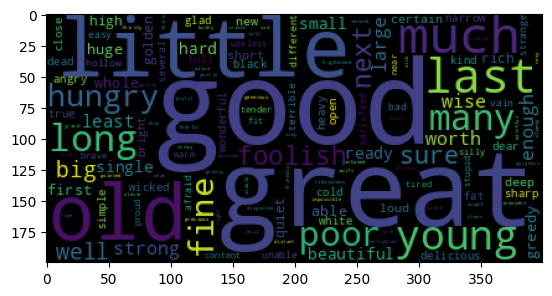

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

254
      POS        Word  Freq
202   ADV        very   147
26    ADV          so   139
73    ADV        then    70
242   ADV        away    61
326   ADV        soon    55
...   ...         ...   ...
3035  ADV      softly     1
3043  ADV      course     1
3070  ADV  pleasantly     1
3078  ADV   meaningly     1
3100  ADV     loosely     1

[254 rows x 3 columns]


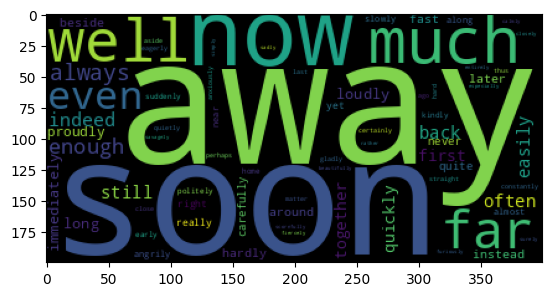

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

## ⛅ ⛅ I don't like the background in black. I want it WHITE!!! ⛄⚡

In [ ]:
#@markdown 📌 Exclude short words from your word cloud.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
#stopwords.add('us')
len(stopwords)
spltxt = text.split()

693


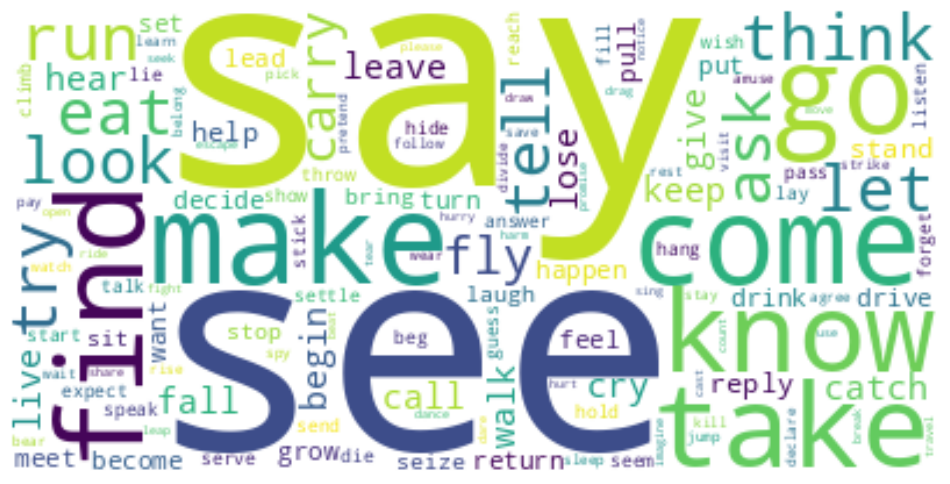

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')

1188


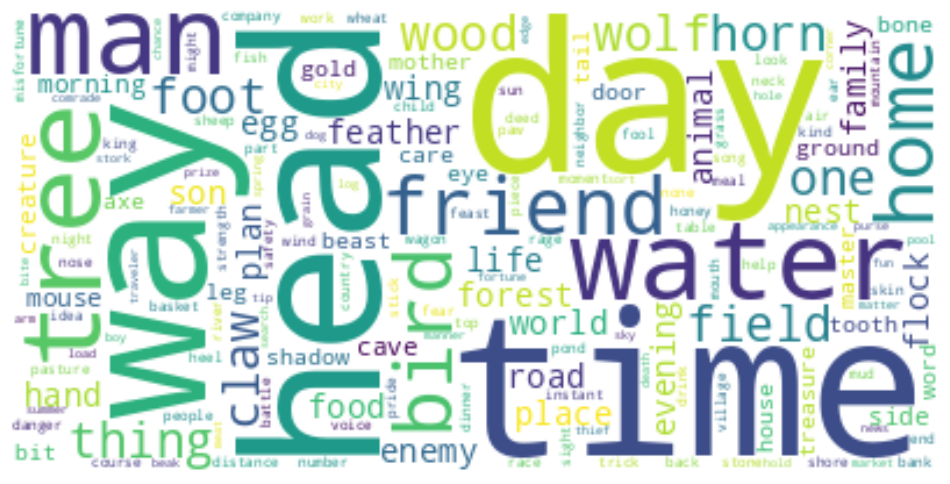

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')

439


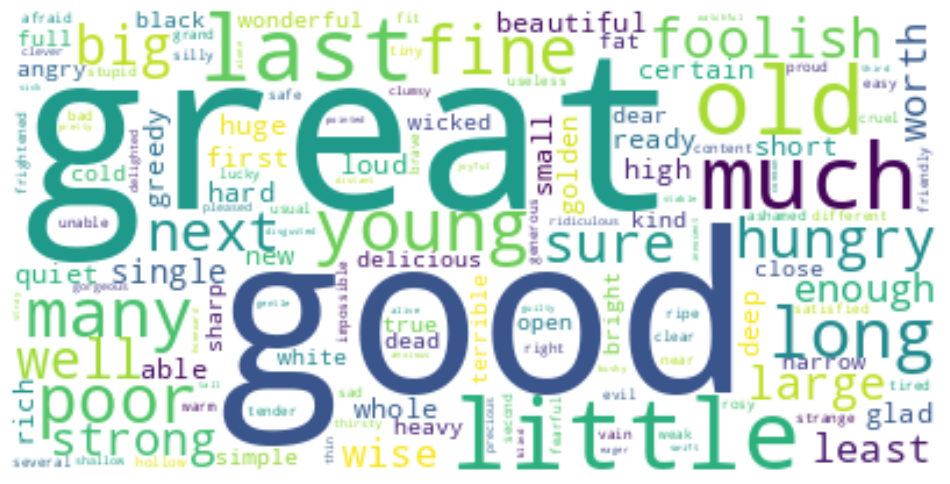

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')

254


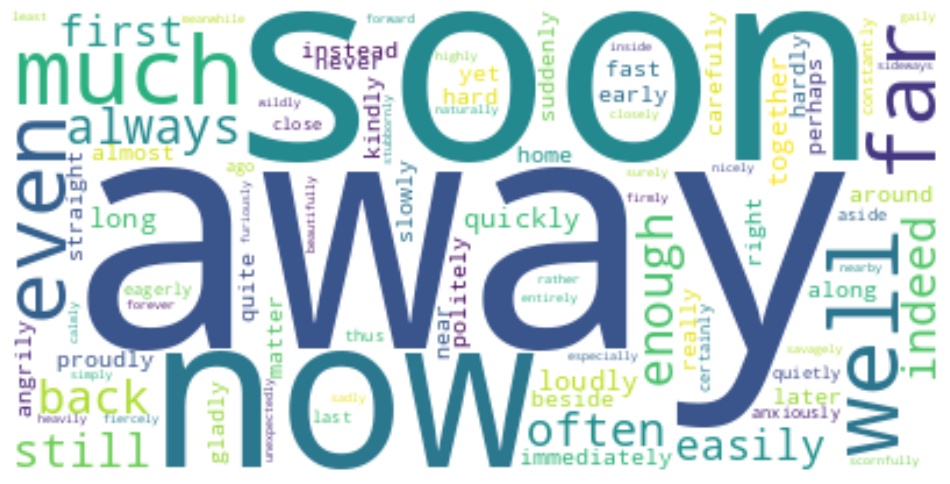

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')

# <font color = 'purple'> **📌  Word frequency by grammatical category**

## 🔨🔧🔩Under construction

In [ ]:
#📌 Open a txt file. <Use a set of duble quotation marks "" and assign the url address as the _url_ variable>
!git clone https://github.com/ms624atyale/Data_Class.git


Cloning into 'Data_Class'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 97 (delta 10), reused 0 (delta 0), pack-reused 69
Receiving objects: 100% (97/97), 145.35 KiB | 3.82 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
import pandas as pd #Importing Pandas package
%cd /content/Data_Class/PG Aesop Fables Original

/content/Data_Class/PG Aesop Fables Original


In [ ]:
file = open("txtdata.txt")
text = file.read().replace("\n", " ") #Replace line with a space.
file.close() #Close the file you have been working on.

# 📌 i) Tokenize your text and ii) Get frequency.

from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
mydata = ct.frequency(mydata) #creates a frequency dictionary



No files found. There may be a problem with your working directory or your file search term.


In [ ]:
# Tokenize the text into word
words = word_tokenize(text)

# Remove stopwords (common words that do not carry significant meaning)
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

# Part-of-speech tagging to identify nouns (NN and NNS)
tagged_words = pos_tag(filtered_words)
nouns = [word for word, pos in tagged_words if pos in ['NN', 'NNS']]

# Calculate noun frequencies
freq_dist = FreqDist(nouns)

# Get the most common nouns and their counts
most_common_nouns = freq_dist.most_common(5)  # Change 5 to the desired number of top nouns

# Print the results
for noun, count in most_common_nouns:
    print(f'{noun}: {count}')